In [189]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

housingInfo = pd.read_csv('housing/train.csv')
housingInfo = housingInfo.sort_values("SalePrice")

#Data to Analyze from main data############
lotArea = housingInfo['LotArea']
overallQ = housingInfo['OverallQual']
overallC = housingInfo['OverallCond']
yearB = housingInfo['YearBuilt']
yearR = housingInfo['YearRemodAdd']
############################################



#Price
price = housingInfo['SalePrice']

all = pd.DataFrame({
    "LotArea":lotArea,
    "YearB": yearB,
    "OverallQ": overallQ,
    "OverallC": overallC,
    "YearR": yearR,
    "Price": price,
})

all.sort_index(inplace=True)
all = (all-all.mean())/all.std()
features = pd.DataFrame({
    "LotArea":all["LotArea"],
    "YearB": all["YearB"],
    "OverallQ": all["OverallQ"],
    "OverallC": all["OverallC"],
    "YearR": all["YearR"]
    
})
price = all["Price"]

print(price.head())
#Graph Equations

0    0.347154
1    0.007286
2    0.535970
3   -0.515105
4    0.869545
Name: Price, dtype: float64


When we are starting with a dummy line we try and make it close to the line of best fit as possible through eyeballing. This is called bias, it is sometimes useful (especially in a simple case) but detremental on larger data sets. The formula we started off with for lot area vs Price is 20x +100

1460


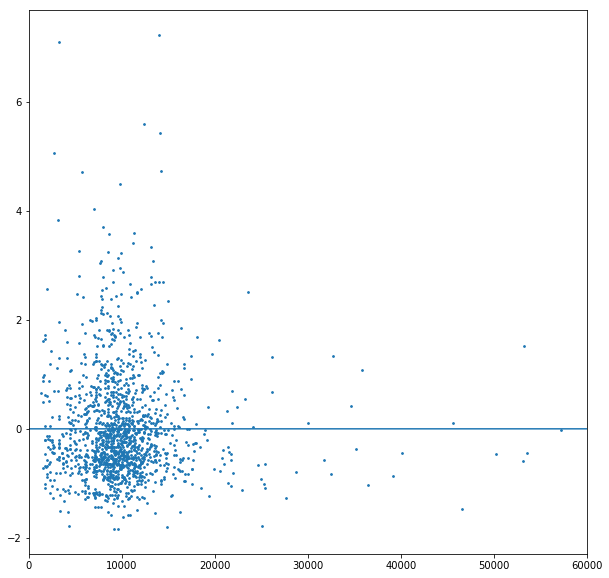

In [26]:
#lotArea Vs Price Model

X = lotArea
Y = price
n = lotArea.shape[0]
print(n)
plt.figure(figsize=(10,10))
plt.scatter(X,Y,3)
plt.xlim(0,60000)
w = 0.
b = 0.
x = np.array(range(0,60000,1))
y = (w*x + b)
plt.plot(x,y)
plt.show()

In [27]:
#LOSS 
def getLoss(X,y,w,b):
    i = 0
    MSE = 0
    elements = X.shape[0]
    loss = np.array(range(0,elements))
    while i<X.shape[0]:
        MSE = MSE + (y[i] - (w*X[i]+b))**2
        i = i+1
    MSE = MSE/i
    return MSE

print(getLoss(features["YearB"],Y,w,b))

0.9993150684931503


In [141]:
# GRADIENT DECENT!

def GradientDecent(w,b,X,y,learningRate,attempt):
    desc = 0
    err = []
    while desc < attempt:
        yGuess = w * X + b
        wGrd = -(2/n) * sum(X * (Y - yGuess))
        bGrd =  -(2/n) * sum(Y - yGuess)

        newW = w - wGrd/learningRate
        newB = b - bGrd/learningRate
        err.append(mvLoss(X,Y,[newB,newW]))
        w = newW
        b = newB
        desc = desc + 1
    plt.scatter(range(0,attempt),err,1)
    plt.show
    return [w,b]

In [163]:
def mvLoss(X,Y,W):
    X = X.values
    i = 0
    MSE = 0
    w = W[1:]
    b = W[0]
    while i < Y.size:
        if(X[i].size == 1):
            MSE = MSE + (Y[i] - (b + w[0]*X[i]))**2
        else:
            MSE = MSE + (Y[i] - (b + sum(w*X[i])))**2
        i = i +1
    MSE = MSE / Y.size
    print(MSE)
    return MSE
mvLoss(features,price,[1,1,1])

2.4539773725259355


2.4539773725259355

0.01637429055366117
0.9010105961664012
0.029475966050090646
0.8380741858468591
0.039959101197302255
0.7977810877796201
0.048347045360982104
0.7719846728965188
0.055058549725373065
0.7554693128785152
0.060428672601045334
0.7448958623521422
0.0647255065348538
0.7381265363482423
0.06816356228928876
0.7337926838908274
0.07091447785937843
0.7310180683512854
0.0731155871531995
0.7292417062189993
0.07487677611007743
0.7281044450813584
0.07628596853434098
0.7273763486692104
0.07741351551380994
0.7269102073689969
0.07831570755587546
0.7266117747601573
0.07903758477747884
0.726420712475015
0.07961518544205216
0.726298390732272
0.08007734509708954
0.7262200780043757
0.08044713613066123
0.7261699406926188
0.08074301961382455
0.7261378418231528
0.08097976693233919
0.7261172915107256


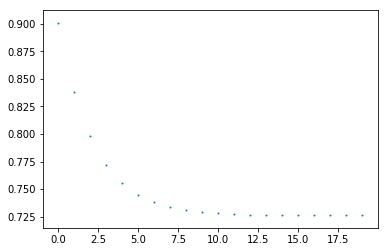

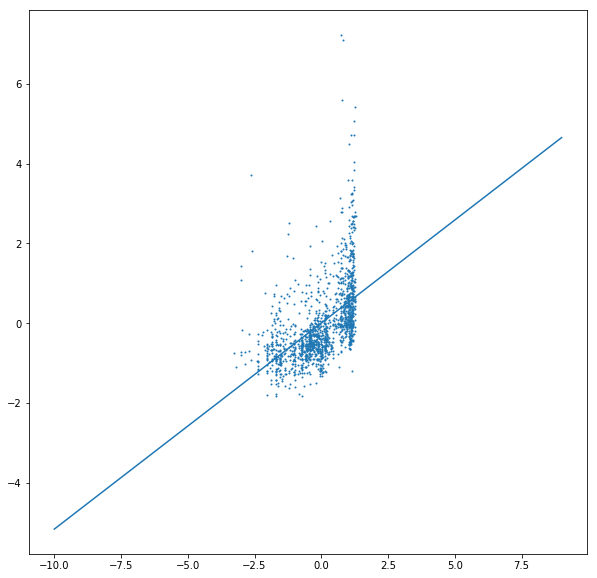

New w: 0.5168480575862626 New b: -3.8963505177238627e-16


In [160]:
w = 0
b = 10000
X = features["YearB"]
result = GradientDecent(0,0,X,Y,10,20)
w = result[0]
b = result[1]
plt.figure(figsize=(10,10))
plt.scatter(X,Y,1)
x = np.array(range(-10,10))
y = (w*x + b)
plt.plot(x,y)
plt.show()
print("New w:",w,"New b:",b)

# Now lets look at the case of n features added to the linear regression model

0.8826547545772443
0.7887804982011415
0.7130716080920304
0.6518566130871565
0.6022172690888272
0.5618331246379296
0.5288582432187591
0.5018234217636034
0.47955862518377285
0.4611314509613584
0.44579830522050545
0.43296565928491004
0.42215930079518205
0.41299992555301357
0.4051837587992783
0.3984671661854987
0.39265442997795136
0.38758803670621833
0.38314095777920554
0.37921051187137655
0.3757134829396734
0.372582235173181
0.36976161965339793
0.367206509907271
0.36487983716171063
0.3627510227758891
0.36079472647775956
0.3589898458066865
0.35731871547102784
0.3557664658859475
0.35432050853225155
0.35297012242303144
0.3517061212391598
0.35052058488114407
0.349406642508365
0.34835829677579266
0.3473702810742743
0.34643794324565363
0.3455571505672685
0.3447242118522757
0.34393581334878925
0.34318896578637387
0.34248096044814325
0.341809332568637
0.34117183069379836
0.3405663909074975
0.3399911150429723
0.33944425216843155
0.3389241827726999
0.3384294051861102


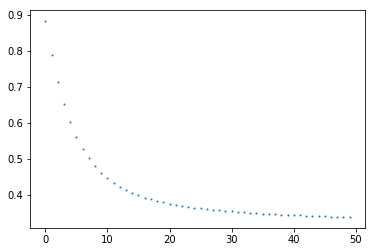

[-7.04935539e-16  1.93582680e-01  1.50265467e-01  5.51213179e-01
  1.42550409e-02  1.38693317e-01]


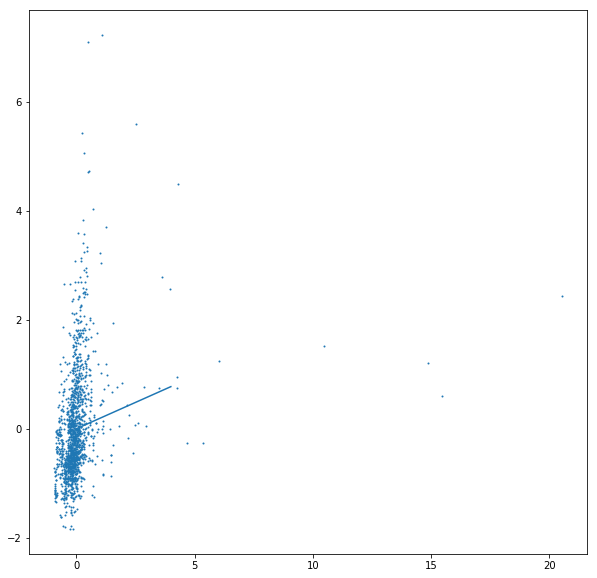

New w: 0.19358268014746227 New b: -7.049355391656965e-16


In [194]:
#GRADIENT DECENT WITH n VARIABLES
def gradientDecent(X,Y,W,FeatureNames,learningRate=40,attempt=50):
    XRow = X.values
    size = Y.size
    NewW = np.zeros(W.size)
    toTeachW = np.zeros(W.size)
    desc = 0
    lossA = []
    while desc < attempt:
        i = 0
        initW = NewW[0]
        WeightL = NewW[1:]
        guessY = []
        #GUESS Y WITH MODEL
        for x in XRow:
            guessY.append(initW + sum(x*WeightL))

        #GET THE NEW WEIGHT BASED ON EACH DERIVATIVE
        toTeachW[0] = (-2/size)*sum(guessY-Y)
        for f in FeatureNames:
            x = X[f]
            toTeachW[i+1] = (-2/size)*sum((guessY - Y)*x)
            i=i+1
        #ADJUST WEIGHT BASED ON THE LEARNING RATE
        getLoss(X["LotArea"].values,Y,NewW[1],NewW[0])
        NewW = NewW + toTeachW/learningRate
        desc = desc + 1
        lossA.append(mvLoss(X,Y, NewW))
    plt.scatter(range(0,attempt),lossA,1)
    plt.show()
    return NewW
names = [
"LotArea",
"YearB",
"OverallQ",
"OverallC",
"YearR"
]

a =gradientDecent(features,price,np.array([1,1,1,1,1,1]),names)
print(a)
newW = a[1]
newB = a[0]
X = all["LotArea"]
plt.figure(figsize=(10,10))
plt.scatter(X,Y,1)
x = np.array(range(0,5,1))
y = (newW*x + newB)
plt.plot(x,y)
plt.show()
print("New w:",newW,"New b:",newB)